In [37]:
import shapely#.geometry import Point, LineString
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import random

import warnings
warnings.filterwarnings('ignore')

import importlib
import GeoPath
importlib.reload(GeoPath)

from joblib import Parallel, delayed
import multiprocessing

In [3]:
gdf = gpd.read_file("./MEX/MEX_ADM2_fixedInternalTopology.shp")
gdf = gdf[['shapeID', 'geometry']]
# gdf.head()

match = pd.read_csv("./gB_IPUMS_match.csv")
match = match[['shapeID', 'MUNI2015']]
ref_dict = dict(zip(match['MUNI2015'], match['shapeID']))
# match.head()

df = pd.read_csv("./mexico2010.csv")
df = df[['GEO2_MX', 'sum_income', 'total_pop', 'unrel_ppl', 'perc_urban', 'sum_num_intmig']]
df['GEO2_MX'] = df['GEO2_MX'].astype(str).str.replace("484", "").astype(int).map(ref_dict)
df = df.rename(columns = {'GEO2_MX': 'shapeID'})
# df.head()

df = df.dropna(subset = ['shapeID'])

shapeIDs = df['shapeID'].to_list()[0:5]

degrees = 2

# target_id = random.choice(df['shapeID'].to_list())
# degrees = random.randint(1, 4)

In [14]:
def load_geographs(target_id, gdf, df, degrees = degrees):
    # print(num)
    return GeoGraph(target_id, gdf, df, degrees = degrees)

In [15]:
# Parallelization
num_cores = multiprocessing.cpu_count()
nums = [i for i in range(len(shapeIDs))]
output = Parallel(n_jobs = num_cores)(delayed(load_geographs)(target_id = y, gdf = gdf, df = df, degrees = degrees) for y in shapeIDs)

In [17]:
[i.neighbors for i in output]

TypeError: 'GeoGraph' object is not iterable

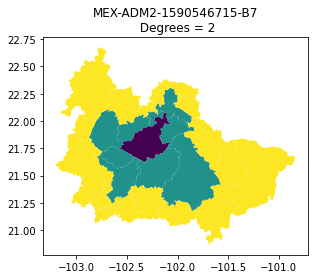

In [19]:
output[0].show()

In [7]:
sending_ids = df.sample(5)['shapeID'].to_list()[0:5]
recieve_ids = df.sample(5)['shapeID'].to_list()[0:5]

In [26]:
def load_geopaths(sending_id, recieving_id, gdf, df = None, degrees = degrees):
    # print(num)
    return GeoPath(sending_id, recieving_id, gdf, df, degrees = degrees)

In [5]:
# # Parallelization
# num_cores = multiprocessing.cpu_count()
# nums = [i for i in range(len(shapeIDs))]
# output = Parallel(n_jobs = num_cores)(delayed(load_geopaths)(sending_id = sid, recieving_id = rid, gdf = gdf, df = df, degrees = degrees) for sid in sending_ids for rid in recieve_ids)

In [46]:
g = GeoPath.GeoPath(sending_ids[0], recieve_ids[0], gdf, df, degrees = degrees)

In [47]:
print(g)

GeoPath(x = [31,4], adj_list = [31,31], y = 414)


In [24]:
g.neighbors_recoded

{0: [0, 5, 3, 1],
 1: [0, 5, 3, 1],
 2: [2, 5, 4],
 3: [0, 5, 3, 1],
 4: [2, 5, 4],
 5: [2, 0, 5, 3, 1, 4],
 6: [8, 7, 10, 6],
 7: [7, 10, 11, 6],
 8: [30, 27, 8, 10, 6],
 9: [9, 13, 14, 12],
 10: [8, 7, 10, 6],
 11: [12, 7, 11],
 12: [9, 14, 12, 11],
 13: [15, 9, 13, 14],
 14: [9, 13, 14, 12],
 15: [15, 13, 16],
 16: [15, 16],
 17: [26, 17, 23],
 18: [22, 18, 20, 19],
 19: [18, 21, 19],
 20: [22, 18, 20],
 21: [21, 19],
 22: [26, 22, 18, 20],
 23: [26, 17, 23, 29, 25],
 24: [28, 25, 27, 24],
 25: [28, 23, 29, 25, 24],
 26: [26, 22, 17, 23],
 27: [28, 30, 27, 8, 24],
 28: [28, 29, 25, 30, 27, 24],
 29: [28, 23, 29, 25, 30],
 30: [28, 29, 30, 27, 8]}

In [25]:
g.x

array([[1.4826240e+09, 2.4410000e+03, 0.0000000e+00,           nan],
       [1.7700415e+09, 5.9180000e+03, 6.7590404e-04, 9.9662048e-01],
       [2.6622825e+09, 5.2920000e+04, 3.5336358e-03, 7.7957296e-01],
       [1.9235268e+09, 5.8740000e+03, 0.0000000e+00, 7.7221656e-01],
       [3.2624320e+09, 1.8236000e+04, 1.9741172e-03, 6.4465892e-01],
       [2.8160128e+09, 2.1214000e+04, 3.7710945e-04, 5.7245213e-01],
       [2.5759711e+09, 5.8169000e+04, 5.6903162e-03, 7.1072221e-01],
       [8.1885092e+09, 1.9592600e+05, 3.3221725e-02, 8.4470665e-01],
       [2.9571912e+09, 1.9435000e+04, 1.0959609e-02, 6.7275536e-01],
       [3.1607918e+09, 6.5488000e+04, 1.4659174e-02, 7.7660030e-01],
       [2.5912389e+09, 1.8998000e+04, 1.8949363e-03, 6.9786292e-01],
       [2.1791572e+09, 2.1350000e+04, 1.1241218e-02, 7.7114755e-01],
       [3.0296553e+09, 2.0162000e+04, 1.0514830e-02, 4.9310583e-01],
       [1.9816179e+09, 5.8700000e+03, 4.7700172e-03,           nan],
       [0.0000000e+00, 0.0000000e+

In [26]:
g.x.shape

(31, 4)